In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import json
import numpy as np

In [2]:
# reading the json file
location_file = "data/location_task_no_nulls.json"
with open(location_file, 'r') as filein:
    location_dict = json.load(filein)

In [3]:
location_dict.keys()

dict_keys(['order_id', 'order_value', 'order_items_count', 'customer_id', 'created_timestamp_local', 'has_instruction', 'logistics_dropoff_distance', 'delivery_postal_code', 'delivery_geohash_precision8', 'has_phone_number', 'has_call_instruction', 'has_leave_instruction', 'has_lift_instruction', 'has_lobby_instruction', 'has_gate_instruction', 'has_knock_instruction', 'has_bell_instruction'])

In [4]:
location_df = pd.DataFrame.from_dict(location_dict)

In [5]:
location_df.sample(20)


,order_id,order_value,order_items_count,customer_id,created_timestamp_local,has_instruction,logistics_dropoff_distance,delivery_postal_code,delivery_geohash_precision8,has_phone_number,has_call_instruction,has_leave_instruction,has_lift_instruction,has_lobby_instruction,has_gate_instruction,has_knock_instruction,has_bell_instruction
956603,y2xz-ml2y,14.90,1,sgdah2bi,2021-03-26T04:16:58,True,27.134358,160125,w21z69tm,True,True,False,False,False,False,True,False
842628,y0pu-7a67,15.40,1,sg6oejne,2021-03-05T18:06:17,True,67.568974,682487,w21zbdef,False,False,False,False,False,False,False,False
1302073,y5vd-zm9f,11.70,2,v9bqa4lq,2021-03-14T09:09:31,True,41.092157,730403,w23b1kkw,False,False,False,False,False,False,False,True
1579603,v6id-ej6p,23.80,2,d2yws5md,2021-03-08T11:54:09,True,10.963032,760413,w23b556v,False,False,False,False,False,False,False,False
1419069,y5jr-s5qu,16.60,2,s6hya9wr,2021-03-27T10:52:20,True,31.747916,541329,w21zun47,False,False,False,False,False,False,False,False
344960,v6ly-ndak,16.05,1,sgzeb3sm,2021-03-29T12:05:24,True,74.026419,560417,w21zg23p,False,False,False,True,False,False,False,False
531862,x8yk-wl1q,9.40,1,w3grh5zv,2021-03-16T15:46:24,True,64.332434,760722,w23b4etf,False,False,False,False,False,False,False,False
1210216,s0ou-mefs,14.64,2,sgaho4sq,2021-03-04T18:31:08,True,74.820718,189558,w21z75zm,False,False,False,False,True,False,False,False
833720,w5pw-7rwk,13.30,1,r8nef1cu,2021-03-05T22:39:58,True,54.277575,731717,w23b4n0n,False,False,False,False,False,False,False,False
2074594,v3gf-2mve,32.90,3,q8xri8zm,2021-03-14T19:42:12,True,33.948071,431011,w21z7uvn,False,False,False,False,False,False,False,False


In [6]:
location_df.shape

(2593799, 17)

In [7]:
# FINDING missing values
location_df.isna().sum()

order_id                       0
order_value                    0
order_items_count              0
customer_id                    0
created_timestamp_local        0
has_instruction                0
logistics_dropoff_distance     0
delivery_postal_code           0
delivery_geohash_precision8    0
has_phone_number               0
has_call_instruction           0
has_leave_instruction          0
has_lift_instruction           0
has_lobby_instruction          0
has_gate_instruction           0
has_knock_instruction          0
has_bell_instruction           0
dtype: int64

In [8]:
location_df = location_df.applymap(lambda x: np.nan if isinstance(x, str) and x == "" else x)

In [9]:
location_df.loc['814434', 'delivery_postal_code']

nan

In [10]:
location_df.isna().sum()

order_id                            0
order_value                         0
order_items_count                   0
customer_id                         0
created_timestamp_local             0
has_instruction                     0
logistics_dropoff_distance          0
delivery_postal_code           230756
delivery_geohash_precision8         0
has_phone_number                    0
has_call_instruction                0
has_leave_instruction               0
has_lift_instruction                0
has_lobby_instruction               0
has_gate_instruction                0
has_knock_instruction               0
has_bell_instruction                0
dtype: int64

The column delivery_postal_code has missing values for 230756 rows  which is around 9% of the total number of observations. 

## Univariate Distribution
Here we consider onve variable at a time and see how it is distributed. This gives an insight about whether the variable in question has outliers in case of continuius variables or for categorical variables if there are any rare classes. Also it reveals about the range of values the variable in questions takes, i.e. min, max of continuous variables and numberof classes for categorical variables. This is really helpful in deciding the feature preprocessing and feature engineering (scaling of variables and grouping rare classes into one class) and slecting the right model architecture.

### Logistic dropoff distance
We first look at the summary statistics for our output variable

In [11]:
# Distirbution of output variable 
location_df['logistics_dropoff_distance'].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    2.593799e+06
mean     9.353974e+01
std      1.652489e+04
min      0.000000e+00
25%      2.167244e+01
50%      3.798452e+01
75%      6.368662e+01
90%      1.027456e+02
95%      1.540649e+02
99%      6.989863e+02
max      1.532825e+07
Name: logistics_dropoff_distance, dtype: float64

Most of the drop off distance is below 100 and almost evrything is beloww 1000. There are outliers which are very unrealistic like 15 million. We need to ignore these data points as the charts and plots. While plotting we ensure that extremely large values of drop off distance are not plotted else the plot does not reveal anything as the most of the data point are squeezed to very small portion of the chart.

/var/folders/ng/zkvd7f7d3592m2sbw32bjcdr0000gp/T/ipykernel_20169/3300949984.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(x*100) for x in ax.get_yticks()], fontsize=16)


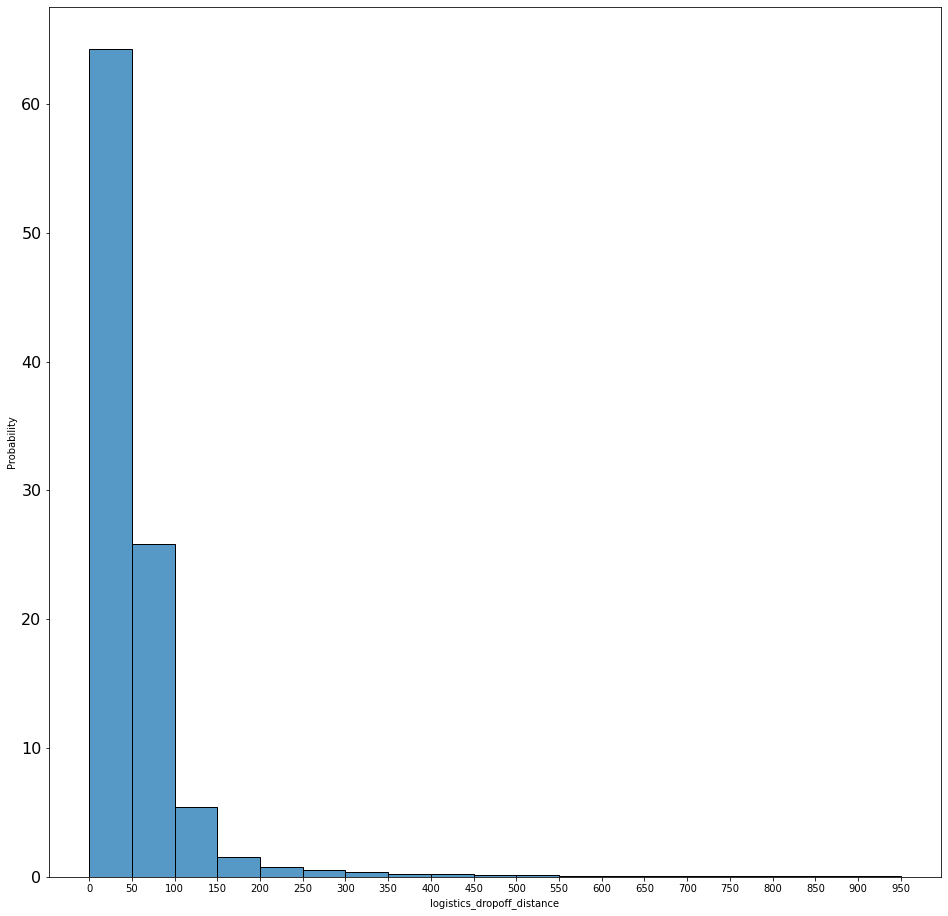

In [12]:
fig, ax = plt.subplots(figsize=(16,16))
sns.histplot(x=location_df['logistics_dropoff_distance'], bins=list(np.arange(0, 1000, 50)), stat="probability")
ax.set_xticks(list(np.arange(0, 1000, 50)))
ax.set_yticklabels([int(x*100) for x in ax.get_yticks()], fontsize=16)
plt.show()

In [13]:
# Distirbution of item counts per order variable 
location_df['order_items_count'].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    2.593799e+06
mean     2.607097e+00
std      1.975311e+00
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
90%      5.000000e+00
95%      6.000000e+00
99%      1.000000e+01
max      6.100000e+01
Name: order_items_count, dtype: float64

Most of the orders have 6 or less than 6 items. Also there are no orders with zero items. This is good way to see if there's error in data entry.

/var/folders/ng/zkvd7f7d3592m2sbw32bjcdr0000gp/T/ipykernel_20169/3806686239.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(x*100) for x in ax.get_yticks()], fontsize=16)


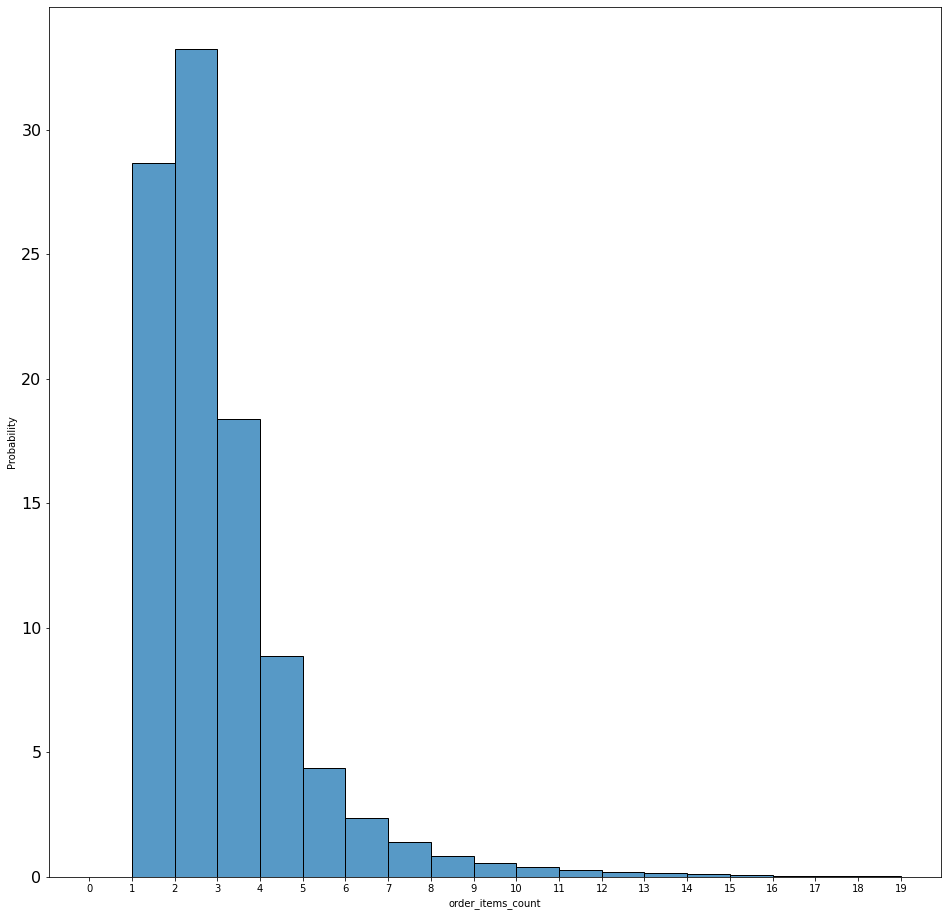

In [14]:
fig, ax = plt.subplots(figsize=(16,16))
sns.histplot(x=location_df['order_items_count'], bins=list(np.arange(0, 20, 1)), stat="probability")
ax.set_xticks(list(np.arange(0, 20, 1)))
ax.set_yticklabels([int(x*100) for x in ax.get_yticks()], fontsize=16)
plt.show()

In [15]:
# Distirbution of item counts per order variable 
location_df.order_value.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    2.593799e+06
mean     2.107854e+01
std      1.600306e+01
min      0.000000e+00
25%      1.150000e+01
50%      1.675000e+01
75%      2.515000e+01
90%      3.760000e+01
95%      4.880000e+01
99%      8.145000e+01
max      8.723500e+02
Name: order_value, dtype: float64

Most of the orders have value of less than 50. The minimum order value is zero. Probably it represents complmentary free items received.

/var/folders/ng/zkvd7f7d3592m2sbw32bjcdr0000gp/T/ipykernel_20169/1676079355.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(x*100) for x in ax.get_yticks()], fontsize=16)


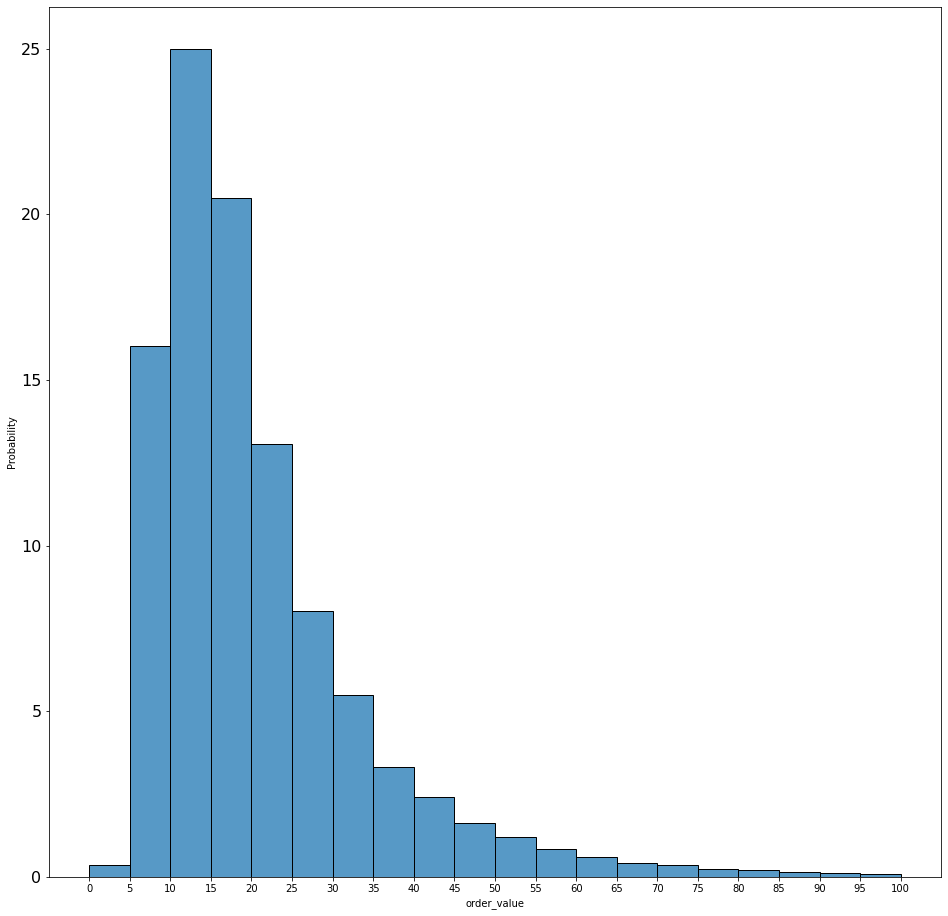

In [16]:
fig, ax = plt.subplots(figsize=(16,16))
sns.histplot(x=location_df['order_value'], bins=list(np.arange(0, 105, 5)), stat="probability")
ax.set_xticks(list(np.arange(0, 105, 5)))
ax.set_yticklabels([int(x*100) for x in ax.get_yticks()], fontsize=16)
plt.show()

The order value and order count both show skewed distribution with order value having a very long tail as expected.

Now we will study the distribution of boolean variables by looking at the percentage count across True and False levels 

In [17]:
# list of boolean variables
bool_var = ['has_instruction',  'has_phone_number', 'has_call_instruction', 'has_leave_instruction', 'has_lift_instruction', 
            'has_lobby_instruction', 'has_gate_instruction', 'has_knock_instruction', 'has_bell_instruction']

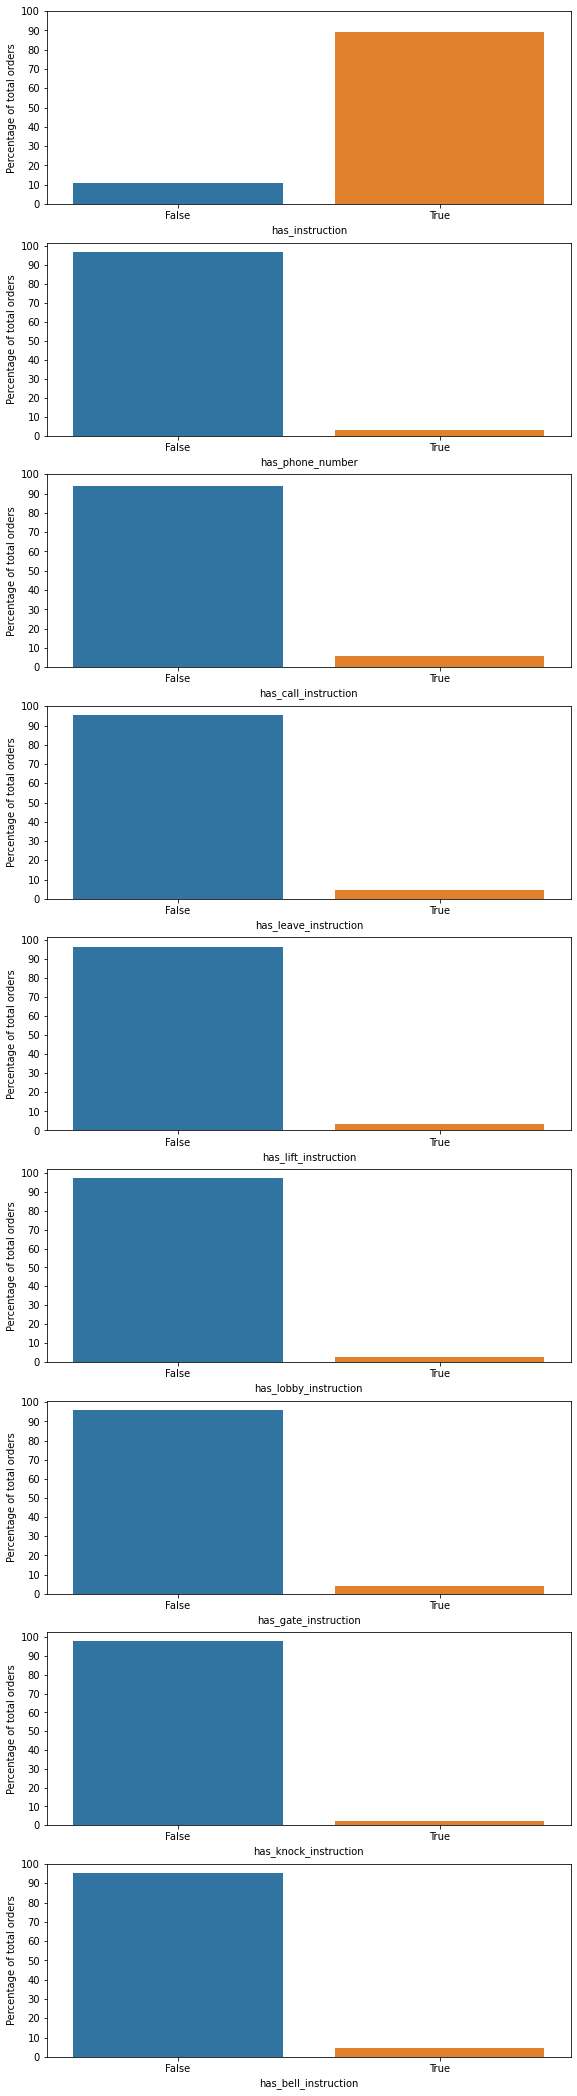

In [18]:
fig , ax = plt.subplots(len(bool_var), 1, figsize=(8,24))
fig.tight_layout()
for i in range(len(bool_var)):
    sns.barplot(x=bool_var[i], y=bool_var[i], data=location_df, estimator=lambda x: len(x) / len(location_df) * 100, ax=ax[i])
    ax[i].set_yticks(list(range(0,110,10)))
    ax[i].set_yticklabels([int(x) for x in ax[i].get_yticks()], fontsize=10)
    ax[i].set_xlabel(bool_var[i], fontsize =10)
    ax[i].set_ylabel("Percentage of total orders", fontsize =10)
plt.subplots_adjust(top=1.2)


In [19]:
len(pd.unique(location_df.customer_id))

565549

In [20]:
location_df.customer_id.value_counts(normalize=True).sort_values(ascending=False)

a1hqj0ax    1.199013e-04
sgijd3to    5.513149e-05
sgdtqv9x    4.819186e-05
sgdg7scy    4.819186e-05
y9upa2tt    4.703526e-05
                ...     
t3gre1fi    3.855349e-07
sgzzf3ge    3.855349e-07
sgkvznjh    3.855349e-07
sgbxnoro    3.855349e-07
sg6slq6j    3.855349e-07
Name: customer_id, Length: 565549, dtype: float64

### Distribution of orders across different geographical regions
One of the aspect which determines the dropoff distance is the location of the order. Certain regions will be having higher drop off distance than others. There are two columsn which tells you about the location of the order
We look to see how distributed our orders across different areas. We will see how many unique regions as grouped/characterized by geohash codes. Higher the precision , more finer the regions would be and consequenctly more number of unique geohash codes (meaning more categories which leads to higher dimensionality). If we go for very coarse precision, we lose too much information. 

In [21]:
len(pd.unique(location_df['delivery_geohash_precision8']))

119673

In [22]:
geohash_perecentage_order_count = location_df['delivery_geohash_precision8'].value_counts(normalize=True).sort_values(ascending=False).mul(100)

In [23]:
sum(geohash_perecentage_order_count[:50])

1.3916267220397571

There are almost 120000 unique geo hash codes at precision level 8 and the top 50 geohash codes we get just 1.4% of all the orders. We definitely need to reduce the precision level. Let's try with precision level 6. we can get the geohash code with precision level 6 by taking the first 6 characters of the precision 8 geohash code 

In [24]:
location_df['delivery_geohash_precision6'] = location_df['delivery_geohash_precision8'].str[:6]

In [25]:
len(pd.unique(location_df['delivery_geohash_precision6']))

625

In [26]:
geohash6_percentage_order_count = location_df['delivery_geohash_precision6'].value_counts(normalize=True).sort_values(ascending=False).mul(100)
geohash6_percentage_order_count

w23b1y    0.899376
w23b1v    0.891511
w23b1u    0.847136
w21zur    0.824852
w23b4n    0.801681
            ...   
w21zw0    0.000039
w21zgz    0.000039
w21zvn    0.000039
w21zgq    0.000039
w21xxx    0.000039
Name: delivery_geohash_precision6, Length: 625, dtype: float64

In [27]:
sum(geohash6_percentage_order_count[:50])

30.664172512981935

There are 625 unique geo hash codes at precision level 8 and the top 50 geohash codes we account 30% of all the orders. We still need to reduce the precision level. Let's try with precision level 5.

In [28]:
location_df['delivery_geohash_precision5'] = location_df['delivery_geohash_precision8'].str[:5]

In [29]:
len(pd.unique(location_df['delivery_geohash_precision5']))

37

In [30]:
geohash5_percentage_order_count = location_df['delivery_geohash_precision5'].value_counts(normalize=True).sort_values(ascending=False).mul(100)
geohash5_percentage_order_count

w21zu    8.917885
w21z6    8.712780
w23b4    8.515193
w21ze    8.262090
w21zt    7.484350
w21z7    6.951078
w21z8    5.467964
w23b1    5.448533
w21zg    5.327591
w21zs    4.670292
w21zb    3.776893
w21zk    3.630158
w21xx    3.590833
w21zv    3.355657
w21z3    2.960060
w21zc    2.845980
w21z9    2.016232
w23b5    1.885690
w23b6    1.501928
w21zf    1.286915
w21zd    1.201365
w23bh    0.679814
w21z4    0.667361
w21zm    0.367608
w21z2    0.110340
w21z5    0.103131
w23b3    0.069859
w21xr    0.068779
w21zy    0.037705
w23b0    0.036703
w21zw    0.024481
w21xq    0.014419
w21z1    0.004318
w21xw    0.004279
w21xz    0.001234
w23b7    0.000424
w21zq    0.000077
Name: delivery_geohash_precision5, dtype: float64

The geohash code at precision level 5 has 37 categories, which is not too high. Thus we will use geohash at precision level 5 as predictor variable instead of precision level 8 geohash code

In [31]:
len(pd.unique(location_df.delivery_postal_code))

47891

In [32]:
location_df.delivery_postal_code.value_counts(normalize=True).sort_values(ascending=False).mul(100)

752106              0.180361
178882              0.117095
018987              0.074353
189350              0.071983
398074              0.068217
                      ...   
485994              0.000042
534310              0.000042
229776              0.000042
Sims Dr 40 38004    0.000042
596377              0.000042
Name: delivery_postal_code, Length: 47890, dtype: float64

In [33]:
sum(location_df.delivery_postal_code.value_counts(normalize=True).sort_values(ascending=False).mul(100)[:50])

2.4445175140697817

There are almost 48K pincodes and the orders are fairly spread across all the pincodes as evident by the fact that top 50 pincodes account for just 2.5 percent of all the orders. Coupled with the fact that around 8 % of the pincodes are missing and we have geohash codes to account for the geography we will not consider postal code as a feature for predicting the drop off distance.

## Bivariate exploration
In this section we see how each of the predictor variables individually impacts the target variable i.e. logistics dropoff distance. For categorical variables (including boolean variables), we see distribution of logistic dropoff distance for each category using histogram or boxplot. For continuous variable we plot line plots.

### Boolean variable
We plot the histograms and box plot to look for differnce in distribution across the True and False labels. for histogram we caculate the percentage distribution across different bin values. Percentages are calculated on basis of total number of orders for that particular label and not the total orders.

/var/folders/ng/zkvd7f7d3592m2sbw32bjcdr0000gp/T/ipykernel_20169/1158632020.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_yticklabels([int(x*100) for x in ax[i].get_yticks()], fontsize=16)
/var/folders/ng/zkvd7f7d3592m2sbw32bjcdr0000gp/T/ipykernel_20169/1158632020.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_yticklabels([int(x*100) for x in ax[i].get_yticks()], fontsize=16)
/var/folders/ng/zkvd7f7d3592m2sbw32bjcdr0000gp/T/ipykernel_20169/1158632020.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_yticklabels([int(x*100) for x in ax[i].get_yticks()], fontsize=16)
/var/folders/ng/zkvd7f7d3592m2sbw32bjcdr0000gp/T/ipykernel_20169/1158632020.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_yticklabels([int(x*100) for x in ax[i].get_yticks()], fontsize=16)
/var/folders/ng/zkvd7f7d3592m2sbw32bjcdr0000gp/T/ipykern

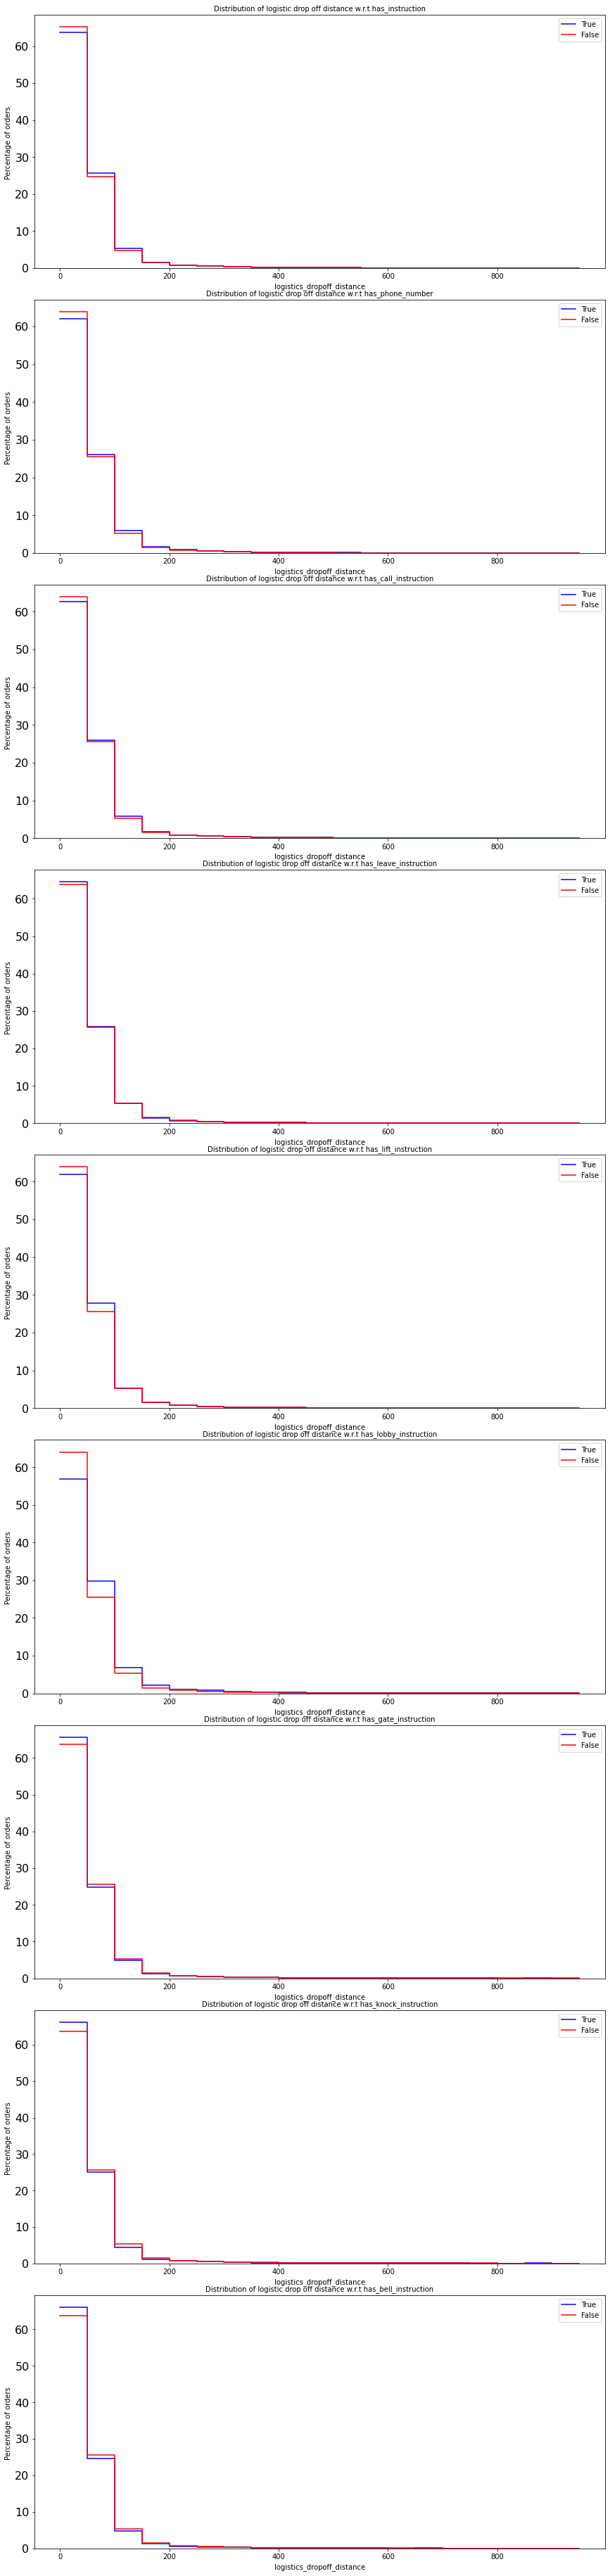

In [34]:
fig , ax = plt.subplots(len(bool_var),1, figsize=(12,36))
color = ['blue', 'red'] 
fig.tight_layout()
for i in range(len(bool_var)):
    for k,val in enumerate([True, False]):
        sns.histplot(x='logistics_dropoff_distance', data=location_df[location_df[bool_var[i]]==val], bins=list(np.arange(0, 1000, 50)), 
                      weights=list(np.ones_like(location_df[location_df[bool_var[i]]==val].index) / len(location_df[location_df[bool_var[i]]==val].index)), label=val, ax=ax[i], color=color[k], fill=False, element='step')
    ax[i].set_yticklabels([int(x*100) for x in ax[i].get_yticks()], fontsize=16)
    ax[i].set_title("Distribution of logistic drop off distance w.r.t "+bool_var[i], fontsize =10)
    ax[i].set_ylabel("Percentage of orders ", fontsize =10)
    ax[i].legend(loc = 'upper right')
plt.subplots_adjust(top=1.4)

There is slight variation in the distribution of dropoff distance across the different labels. The difference is most stark for has_lobby_instruction. However, it's possible that the correlation between the dropoff distance and the variable would not be one to one but combination of two or more boolean variables or other variables. Hence will consider all these variables as predictor variables for the modelling exercise

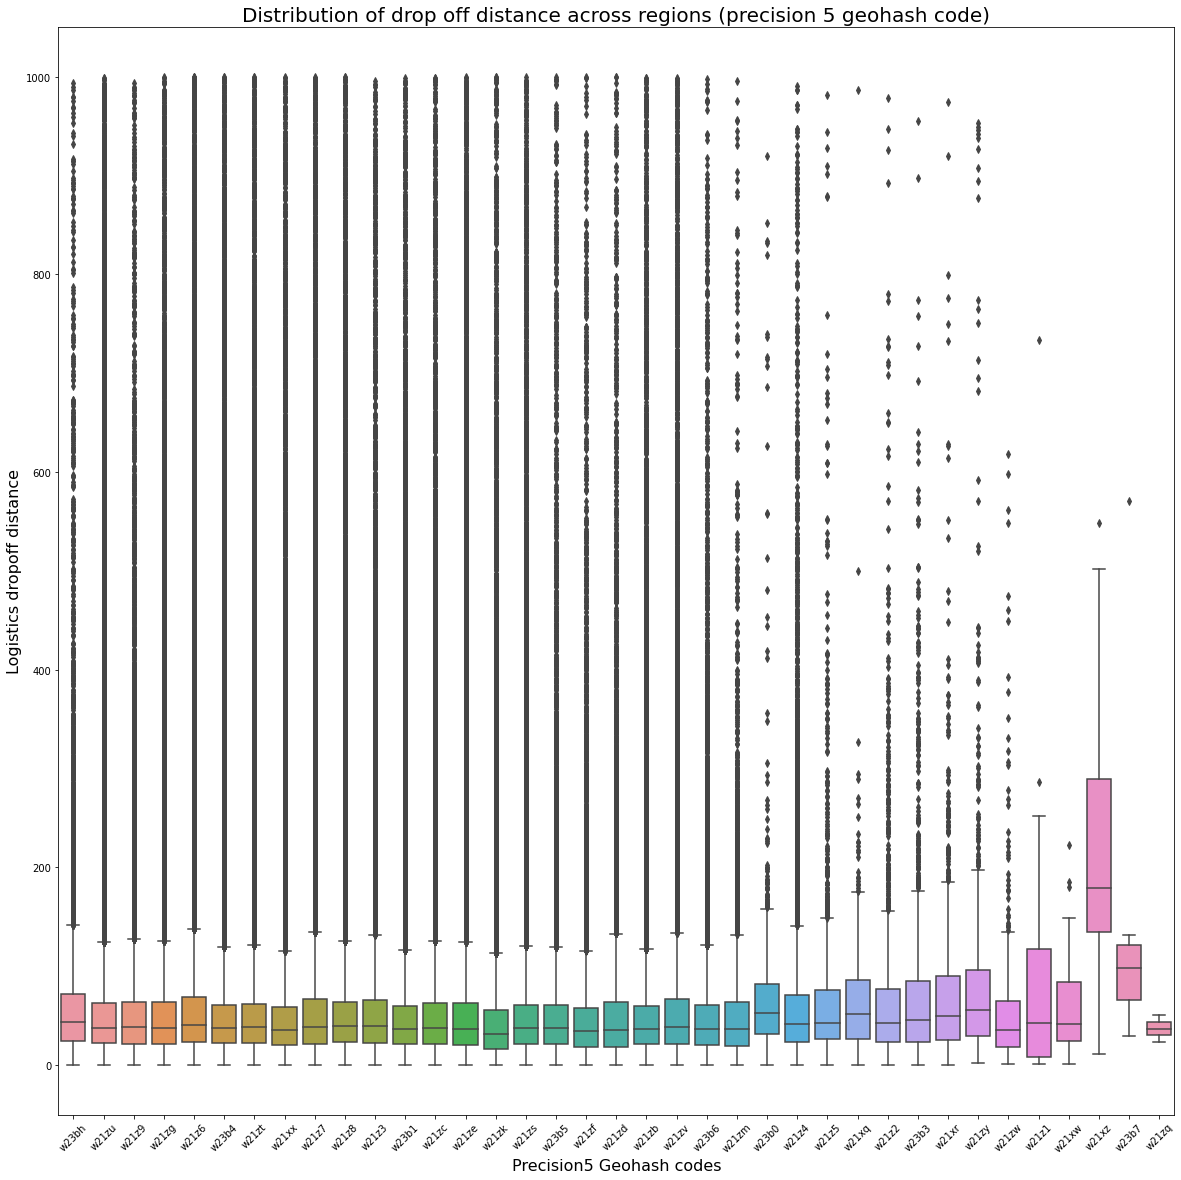

In [35]:
fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot(x='delivery_geohash_precision5', y='logistics_dropoff_distance', data=location_df[location_df.logistics_dropoff_distance < 1000])
plt.title("Distribution of drop off distance across regions (precision 5 geohash code)", fontsize=20)
plt.xticks(rotation=45)
plt.xlabel("Precision5 Geohash codes", fontsize =16)
plt.ylabel("Logistics dropoff distance", fontsize =16)
plt.show()

Here we can see the dropoff distance distribution varies across all goehash codes. Specially region corresponding to geohash code *w21xz* has signifcantly higher dropoff distance than other regions

### Date Variable
The data is of time series nature. Here we will look if the dropoff distance changes along the time. The date column also has the time and not just date. To look for trend we will look at the daily mean dropoff distance. The date column also has time information. We will also look at hourly mean per day to see if there's an hourly trend too. We also see if there's weekly trend or if the day of the week influences the drop off distance. we will consider only rows where dropoff distance value is below 1000 so that graph is more detailed.

In [36]:
location_df['created_timestamp_local'] = pd.to_datetime(location_df['created_timestamp_local']) 
location_df['Order_date'] = location_df['created_timestamp_local'].dt.date

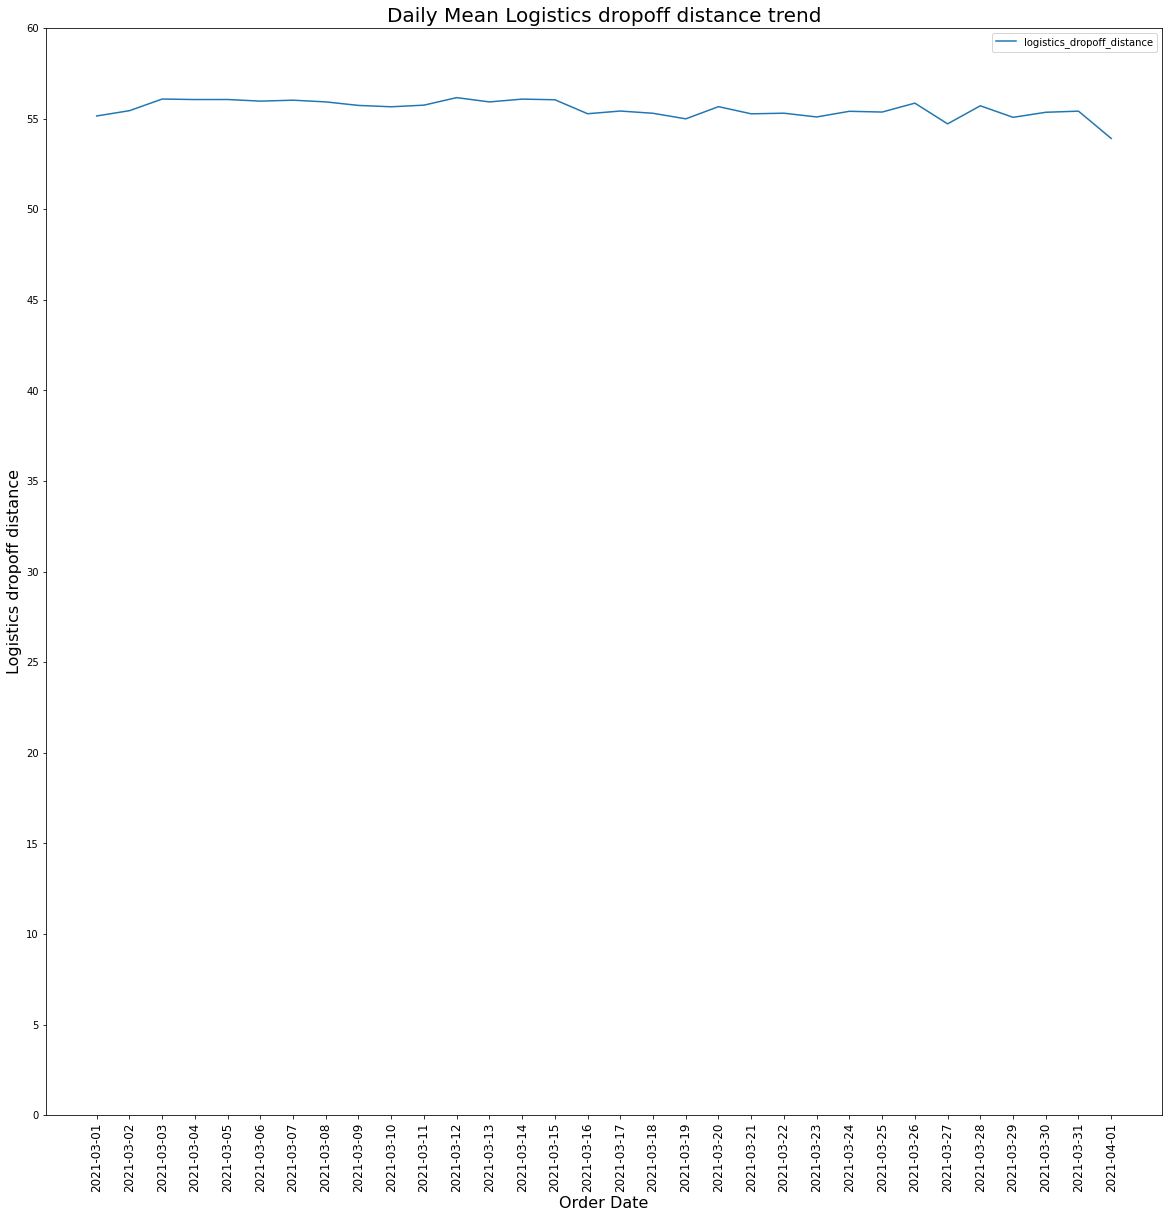

In [37]:
fig, ax = plt.subplots(figsize=(20,20))
location_df[location_df['logistics_dropoff_distance']<1000].groupby('Order_date')['logistics_dropoff_distance'].agg('mean').reset_index().sort_values(by='Order_date',ascending=True).plot(x='Order_date', y='logistics_dropoff_distance', ax=ax)
ax.set_yticks(list(np.arange(0,65,5)))
ax.set_xticks(list(pd.unique(location_df['Order_date'])))
ax.set_xticklabels(list(pd.unique(location_df['Order_date'])), fontsize=12, rotation=90)
plt.title("Daily Mean Logistics dropoff distance trend", fontsize=20)
plt.xlabel("Order Date", fontsize =16)
plt.ylabel("Logistics dropoff distance", fontsize =16)
plt.show()

In [38]:
location_df['Order_hour'] = location_df.created_timestamp_local.dt.hour

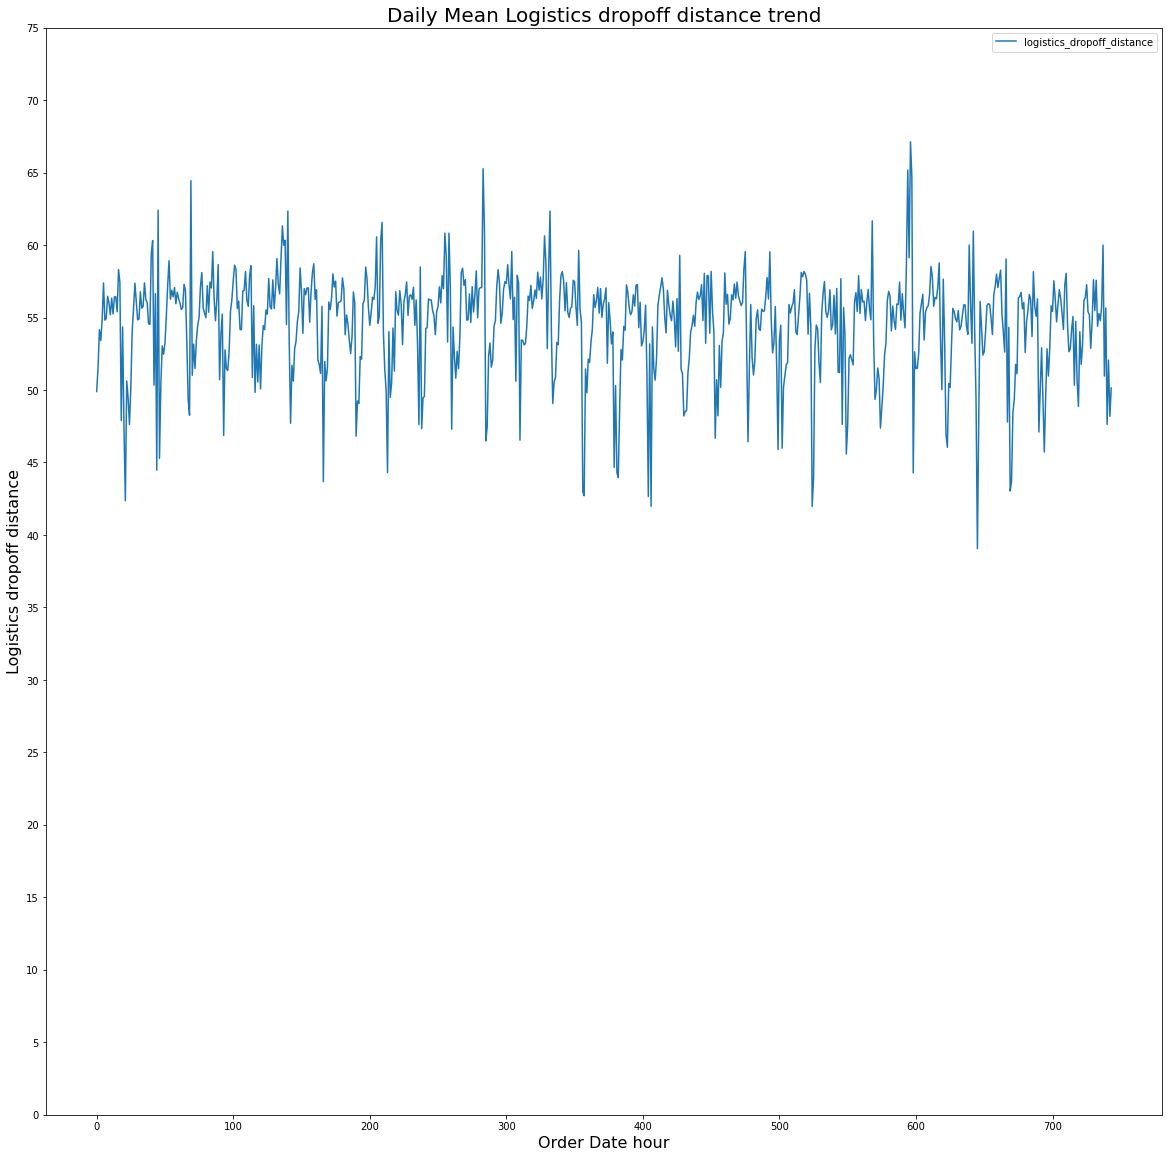

In [39]:
fig, ax = plt.subplots(figsize=(20,20))
location_df[location_df['logistics_dropoff_distance']<1000].groupby(['Order_date','Order_hour'])['logistics_dropoff_distance'].agg('mean').reset_index().plot(y='logistics_dropoff_distance', ax = ax)
ax.set_yticks(list(np.arange(0,80,5)))
plt.title("Daily Mean Logistics dropoff distance trend", fontsize=20)
plt.xlabel("Order Date hour", fontsize =16)
plt.ylabel("Logistics dropoff distance", fontsize =16)
plt.show()

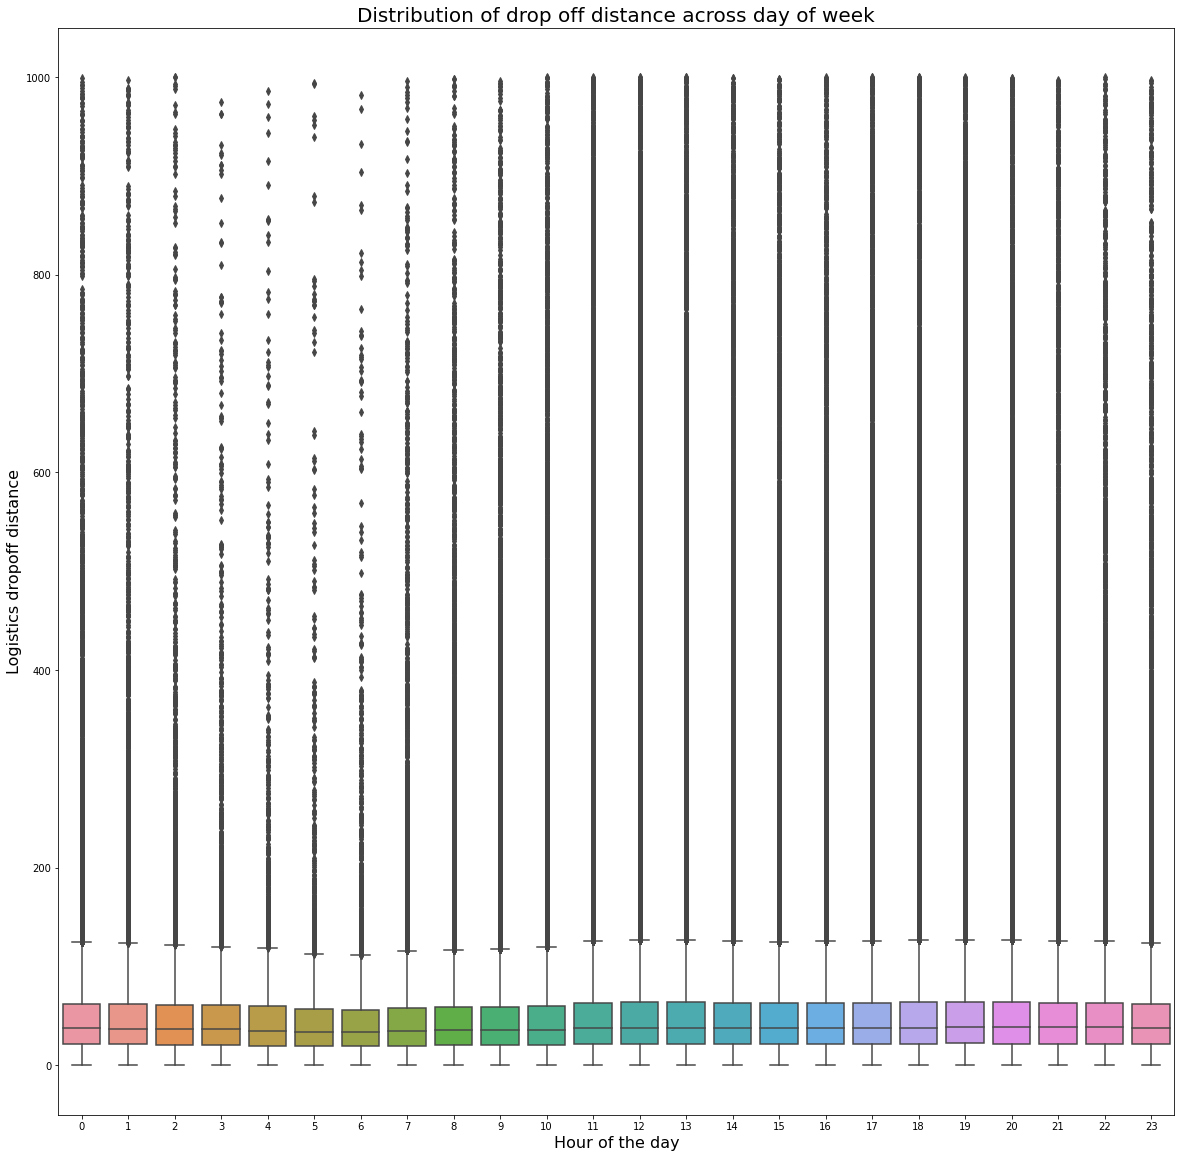

In [40]:
# box plot for each hour of the day
fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot(x='Order_hour', y='logistics_dropoff_distance', data=location_df[location_df.logistics_dropoff_distance < 1000])
plt.title("Distribution of drop off distance across day of week", fontsize=20)
plt.xlabel("Hour of the day", fontsize =16)
plt.ylabel("Logistics dropoff distance", fontsize =16)
plt.show()

The daily mean is almost same across all the day but within a day it varies from hour to hour. Lets see if the dropoff distance varies along day of the week  

In [41]:
# Day of week
location_df['Order_day_of_week'] = location_df.created_timestamp_local.dt.day_name()

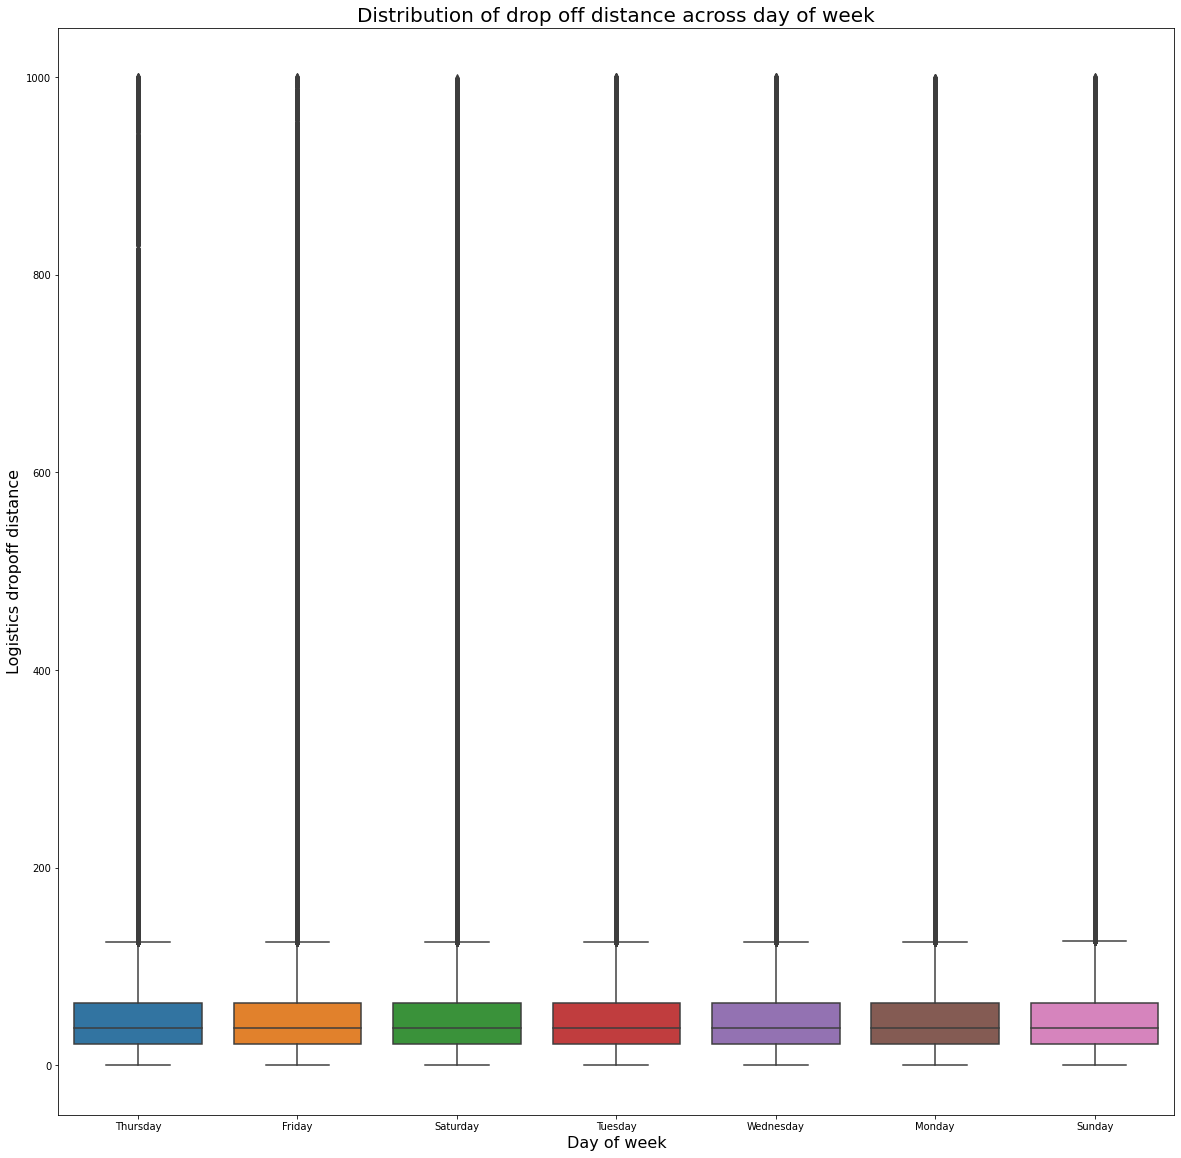

In [42]:
fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot(x='Order_day_of_week', y='logistics_dropoff_distance', data=location_df[location_df.logistics_dropoff_distance < 1000])
plt.title("Distribution of drop off distance across day of week", fontsize=20)
plt.xlabel("Day of week", fontsize =16)
plt.ylabel("Logistics dropoff distance", fontsize =16)
plt.show()

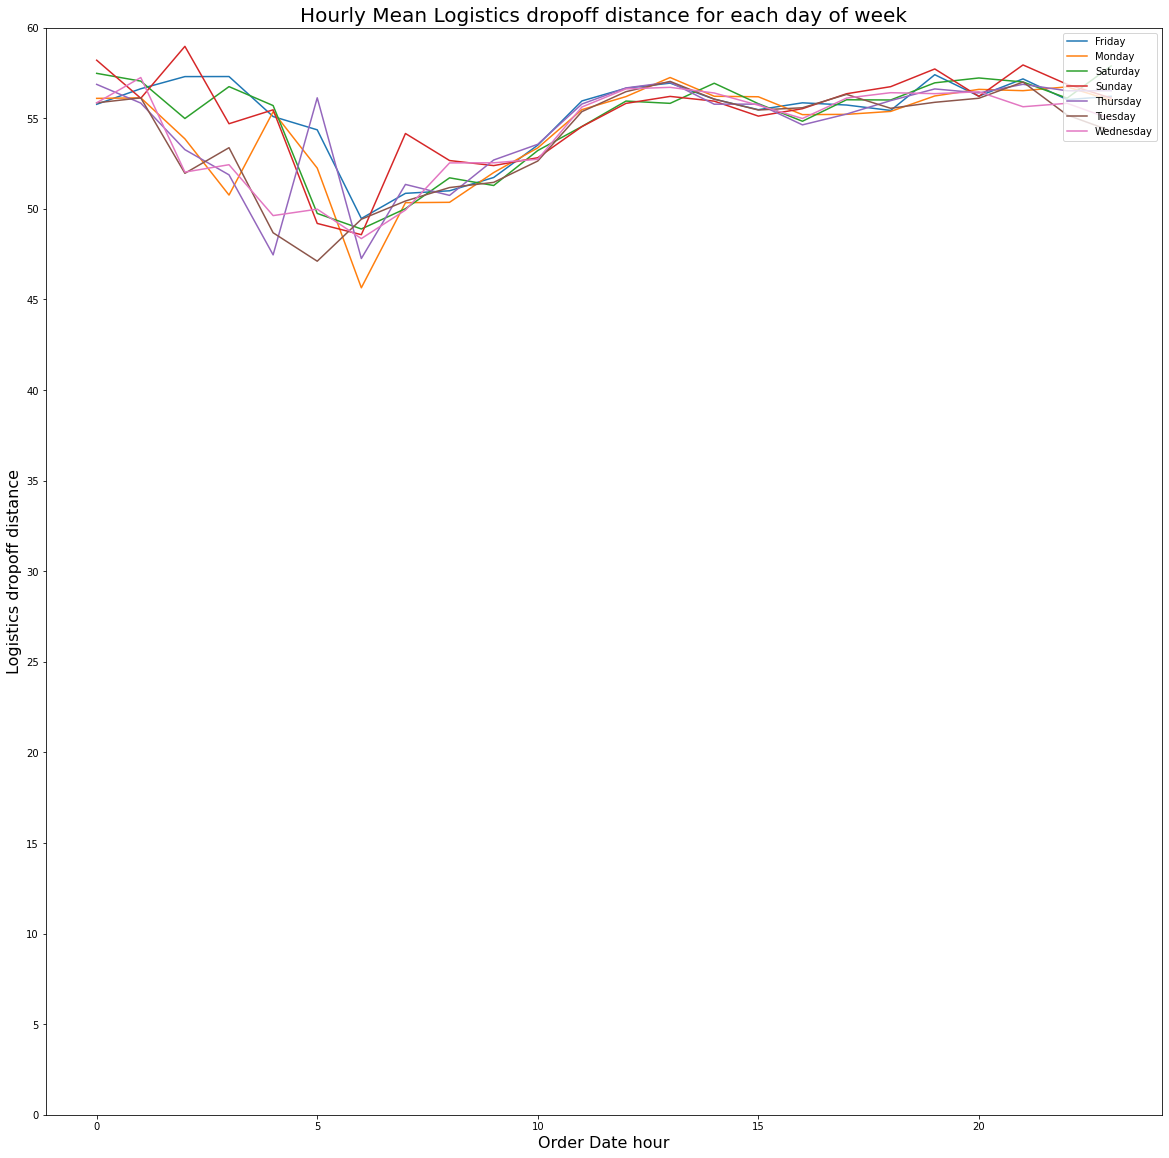

In [43]:
fig, ax = plt.subplots(figsize=(20,20))
location_df[location_df['logistics_dropoff_distance']<1000].groupby(['Order_day_of_week','Order_hour'])['logistics_dropoff_distance'].agg('mean').reset_index().pipe((sns.lineplot, "data"), x='Order_hour', y='logistics_dropoff_distance', hue='Order_day_of_week')
ax.set_yticks(list(np.arange(0,65,5)))
ax.legend(loc = 'upper right')
plt.title("Hourly Mean Logistics dropoff distance for each day of week", fontsize=20)
plt.xlabel("Order Date hour", fontsize =16)
plt.ylabel("Logistics dropoff distance", fontsize =16)
plt.show()

From the box plot it seems there is no variation of daily mean logistic drop off distance along the days of week but the hourly mean is different trend for different days. thus we will consider days_of_week and hour_of_day as features.

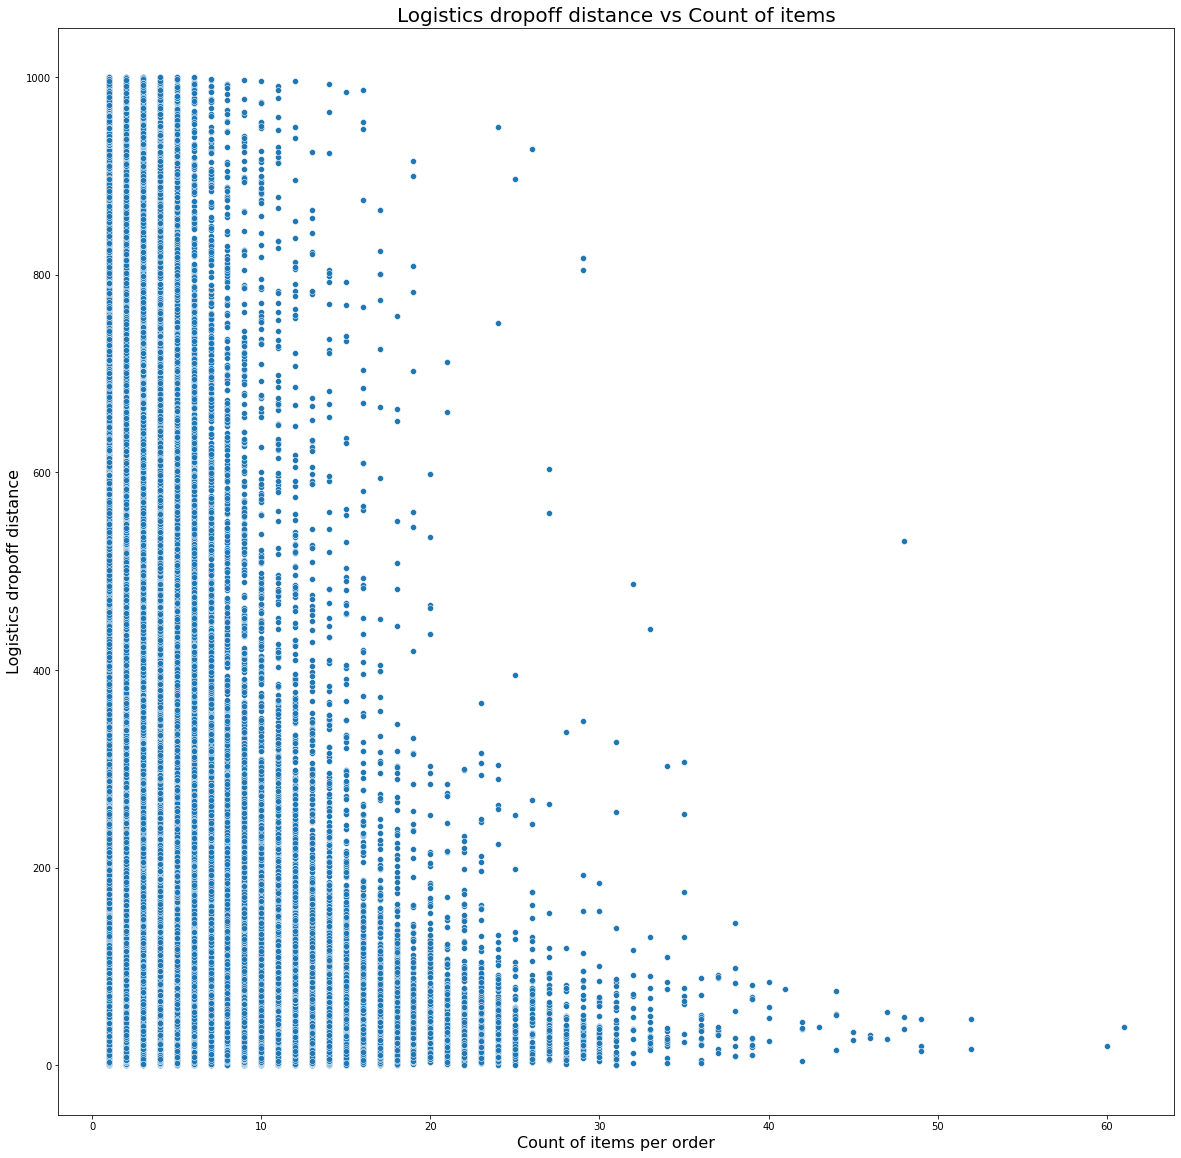

In [44]:
fig, ax = plt.subplots(figsize=(20,20))
location_df[location_df['logistics_dropoff_distance']<1000].pipe((sns.scatterplot, "data"), x='order_items_count', y='logistics_dropoff_distance')
plt.title("Logistics dropoff distance vs Count of items", fontsize=20)
plt.xlabel("Count of items per order", fontsize =16)
plt.ylabel("Logistics dropoff distance", fontsize =16)
plt.show()

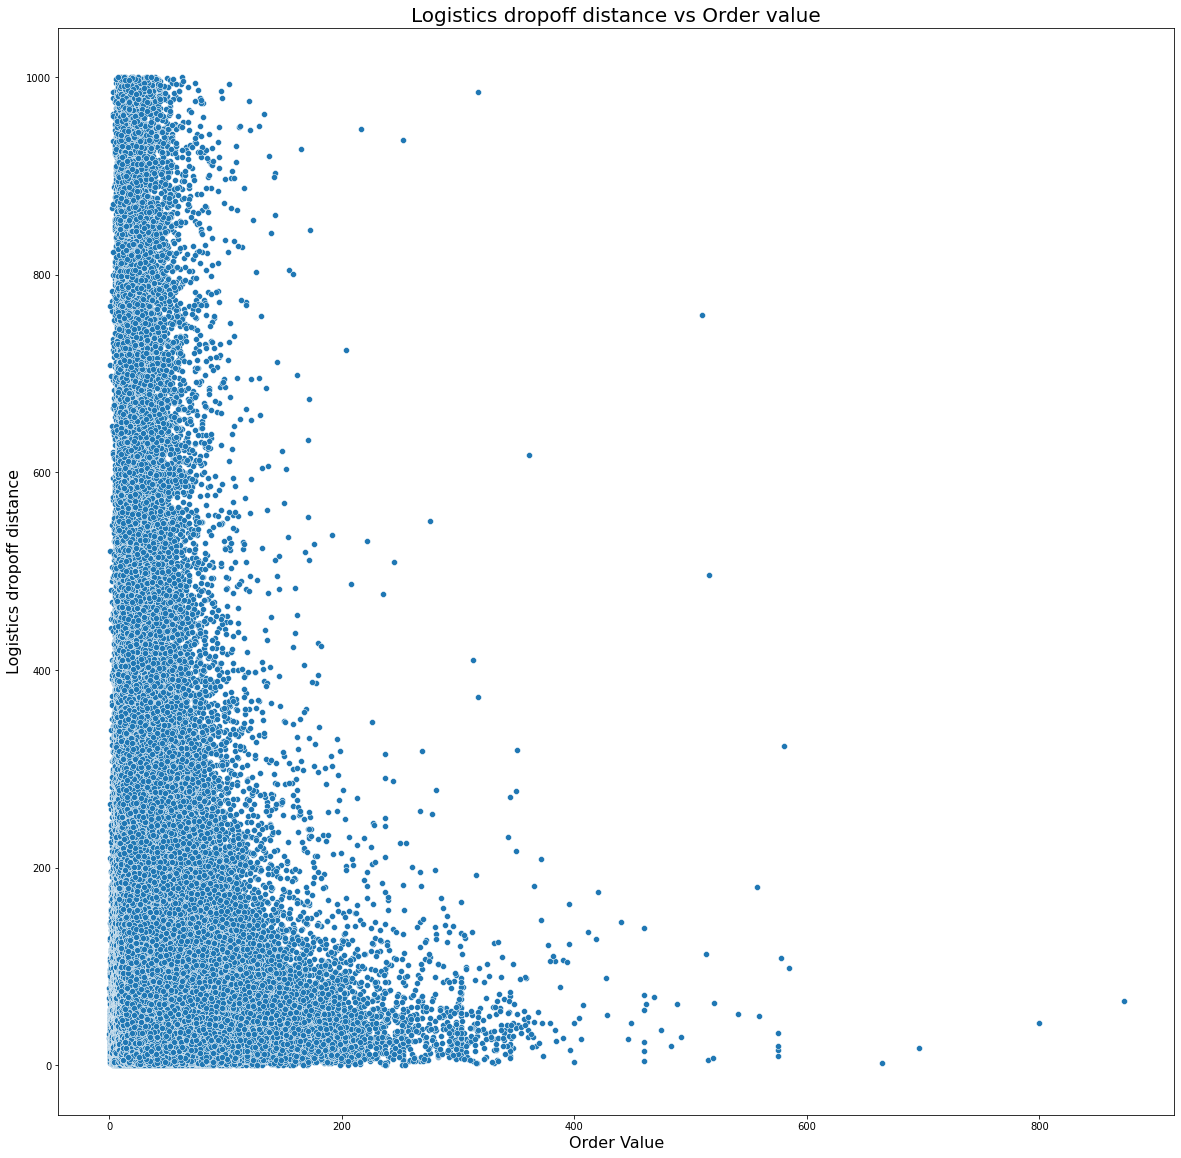

In [45]:
fig, ax = plt.subplots(figsize=(20,20))
location_df[location_df['logistics_dropoff_distance']<1000].pipe((sns.scatterplot, "data"), x='order_value', y='logistics_dropoff_distance')
plt.title("Logistics dropoff distance vs Order value", fontsize=20)
plt.xlabel("Order Value", fontsize =16)
plt.ylabel("Logistics dropoff distance", fontsize =16)
plt.show()

The dropoff distance seems to be slightly decreasing with increase in order value. Lets narrow down the plot to consider only orders below value of 200. 

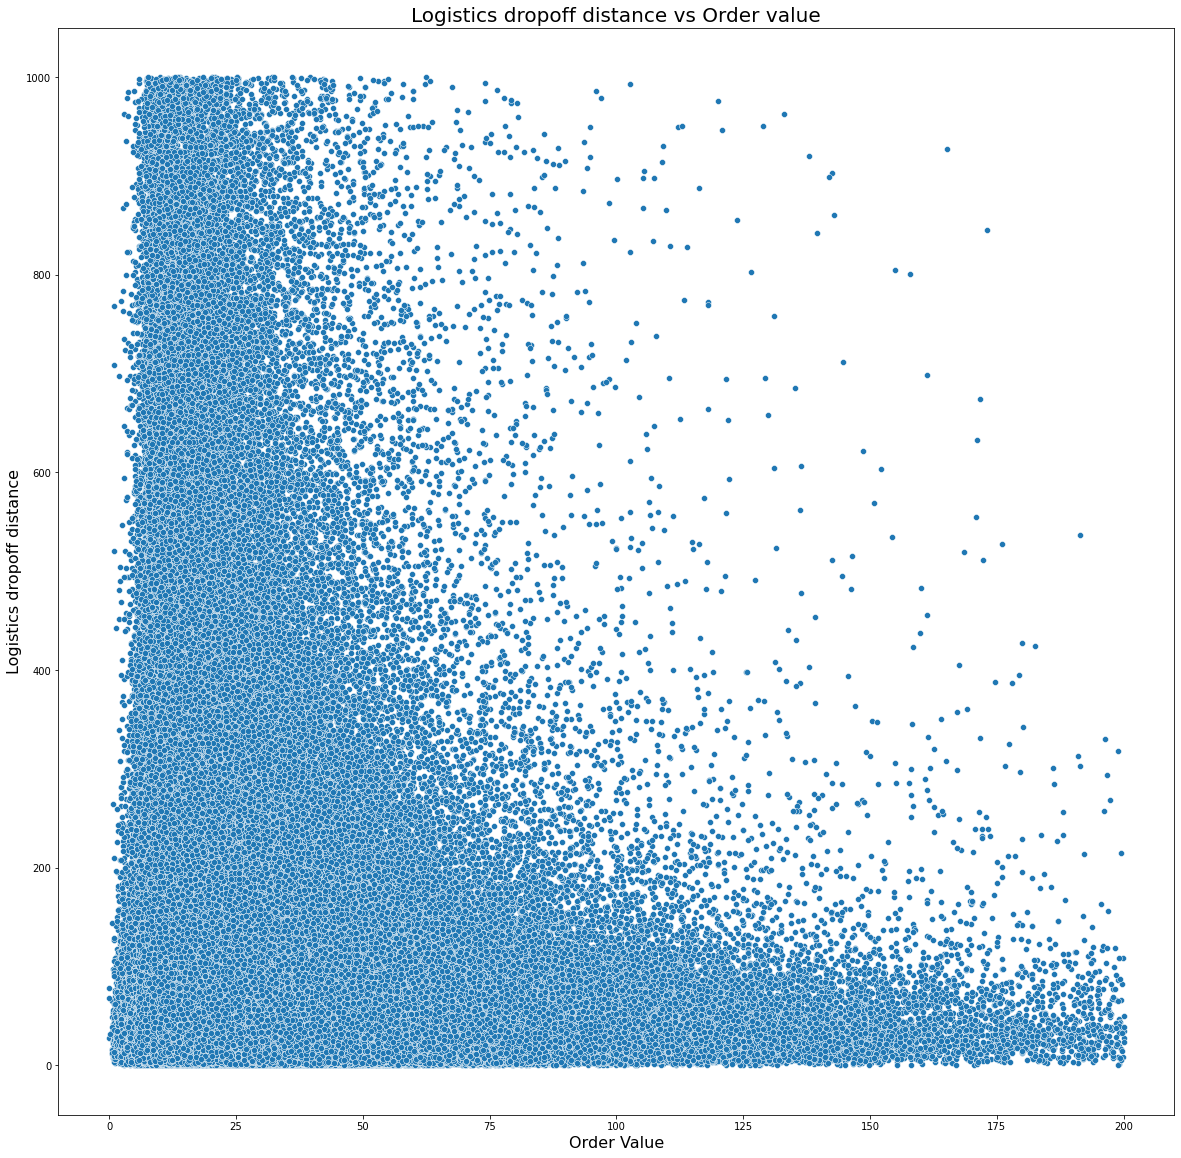

In [46]:
fig, ax = plt.subplots(figsize=(20,20))
location_df[(location_df['logistics_dropoff_distance']<1000) &(location_df['order_value']<=200) ].pipe((sns.scatterplot, "data"), x='order_value', y='logistics_dropoff_distance')
plt.title("Logistics dropoff distance vs Order value", fontsize=20)
plt.xlabel("Order Value", fontsize =16)
plt.ylabel("Logistics dropoff distance", fontsize =16)
plt.show()

There seems to be slight correlation between logistics drop off distance and order value. But this could be due to other factors as correlation does not always mean causation. This is could be vert well be the case as drop off distance would primarily depend on location and how the well the customer enters the address related data.Yet we let the machine learning model do the the selection of faetures.

## Summary

Base on the various plots and the summary statistics, we conclude that:
1. The output values take extremely high values. We will exclude those rows because these extreme rows could impact the model training.
2. The geo has code at precision level 8 has too many classes and there for modeling purposes we will use geohash code at level 5.
3. Geohash code w21xz has very droppoff distance value. 
3. The pincode is redundant as the geography is described by goehash code and customer id, order are just identifiers for order and customer id and will not be used for modeling purposes.
4. Most of the customers have atleast one sort of instruction but not all the instructions. Infact if we look, all other instructions are false.
5. There's some dependence on the hour of the day when the order is placed and the day of the week the order is placed. We will consider them as features for modelling exercise